In [24]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyrepseq as prs
import pyrepseq.plotting as pp
from pyrepseq import nearest_neighbor
import tidytcells
import igraph
import pyrepseq.metric.tcr_metric as tm
import pwseqdist
import seaborn as sns
import scipy.stats
from statsmodels.stats.proportion import test_proportions_2indep
from statsmodels.stats.multitest import fdrcorrection
from metaclonotypist import *

import sklearn.metrics, sklearn.cluster

import sys

from clustcr import Clustering, datasets
from clustcr.clustering.clustering import ClusteringResult
import clustcr
from clustcr.modules.gliph2 import gliph2
from clustcr.modules.ismart import ismart

import warnings
import gzip

plt.style.use('seaborn-v0_8-paper')
directory = '/Users/rishikasaxena/Library/CloudStorage/OneDrive-UniversityCollegeLondon/'

In [3]:
hla_df = pd.read_csv('/Users/rishikasaxena/Library/CloudStorage/OneDrive-UniversityCollegeLondon/hla_ping_full-dataset.csv')
hla_df

,Unnamed: 0,DPA1.1,DPA1.2,B.1,B.2,DPB1.1,DPB1.2,A.1,A.2,C.1,C.2,DRB1.1,DRB1.2,DQAB1,DQAB2,DQAB3,DQAB4
0,BH0022,DPA1*01,DPA1*02,B*08,B*51,DPB1*04,DPB1*13,A*01,A*02,C*07,C*14,DRB1*03,DRB1*11,DQA1*05_DQB1*02,DQA1*05_DQB1*03,DQA1*05_DQB1*02,DQA1*05_DQB1*03
1,BH0029,DPA1*02,DPA1*02,B*08,B*53,DPB1*10,DPB1*13,A*01,A*68,C*04,C*07,DRB1*03,DRB1*13,DQA1*01_DQB1*02,DQA1*01_DQB1*06,DQA1*05_DQB1*02,DQA1*05_DQB1*06
2,BH0046,DPA1*01,DPA1*02,B*07,B*58,DPB1*01,DPB1*02,A*02,A*33,C*03,C*07,DRB1*04,DRB1*09,DQA1*03_DQB1*02,DQA1*03_DQB1*03,DQA1*03_DQB1*02,DQA1*03_DQB1*03
3,BH0047,DPA1*02,DPA1*02,B*40,B*40,DPB1*05,DPB1*05,A*24,A*34,C*04,C*04,DRB1*09,DRB1*15,DQA1*01_DQB1*03,DQA1*01_DQB1*06,DQA1*03_DQB1*03,DQA1*03_DQB1*06
4,BH0050,DPA1*01,DPA1*01,B*51,B*51,DPB1*04,DPB1*04,A*11,A*11,C*16,C*16,DRB1*01,DRB1*01,DQA1*01_DQB1*05,DQA1*01_DQB1*05,DQA1*01_DQB1*05,DQA1*01_DQB1*05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BH0164,DPA1*01,DPA1*02,B*15,B*44,DPB1*05,DPB1*21,A*02,A*11,C*07,C*08,DRB1*07,DRB1*12,DQA1*02_DQB1*02,DQA1*02_DQB1*03,DQA1*06_DQB1*02,DQA1*06_DQB1*03
154,WH0165,DPA1*01,DPA1*02,B*15,B*40,DPB1*02,DPB1*03,A*02,A*33,C*04,C*07,DRB1*09,DRB1*16,DQA1*01_DQB1*03,DQA1*01_DQB1*05,DQA1*03_DQB1*03,DQA1*03_DQB1*05
155,WH0167,DPA1*01,DPA1*03,B*15,B*41,DPB1*02,DPB1*04,A*02,A*02,C*07,C*16,DRB1*01,DRB1*11,DQA1*01_DQB1*05,DQA1*01_DQB1*06,DQA1*01_DQB1*05,DQA1*01_DQB1*06
156,WH0186,DPA1*01,DPA1*02,B*35,B*44,DPB1*02,DPB1*02,A*01,A*23,C*04,C*04,DRB1*10,DRB1*15,DQA1*01_DQB1*05,DQA1*01_DQB1*06,DQA1*01_DQB1*05,DQA1*01_DQB1*06


In [20]:
tst_alpha = pd.read_csv('/Users/rishikasaxena/TRACERx_TCR_signatures-1/TST/combined_subsampled_5000_10000_alpha_withduplicates.csv')
tst_alpha

,TRAV,TRAJ,CDR3A,clonal_count,CDR3A_NT,clonal_frequency,tissue,TB.exposure,sample,Sample.ID,bioidentity,TRAVshort,TB.exposure.short
0,TRAV26-1*01,NaN,CIVRSETSGSRLTF,17,GATGCTAAGACCACCCAGCCCCCCTCCATGGATTGCGCTGAAGGAA...,0.001133,TST_D7,recent: other,BH0046_SB7_alpha,BH0046,NaN,TRAV26-1,recent
1,TRAV4*01,TRAJ15,CLVGPFNQAGTALIF,39,CTTGCTAAGACCACCCAGCCCATCTCCATGGACTCATATGAAGGAC...,0.004321,TST_D7,recent: other,BH0046_SB7_alpha,BH0046,TRAV4CLVGPFNQAGTALIFTRAJ15,TRAV4,recent
2,TRAV12-1*01,TRAJ48,NaN,1,CGGAAGGAGGTGGAGCAGGATCCTGGACCCTTCAATGTTCCAGAGG...,0.000021,TST_D7,recent: other,BH0046_SB7_alpha,BH0046,NaN,TRAV12-1,recent
3,TRAV17*01,TRAJ54,CATDARGAQKLVF,118,AGTCAACAGGGAGAAGAGGATCCTCAGGCCTTGAGCATCCAGGAGG...,0.011364,TST_D7,recent: other,BH0046_SB7_alpha,BH0046,TRAV17CATDARGAQKLVFTRAJ54,TRAV17,recent
4,TRAV4*01,TRAJ15,CLVGPFNQAGTALIF,30,CTTGCTAAGACCACCCAGCCCATCTCCATGGACTCATATGAAGGAC...,0.002397,TST_D7,recent: other,BH0046_SB7_alpha,BH0046,TRAV4CLVGPFNQAGTALIFTRAJ15,TRAV4,recent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594389,TRAV41*01,TRAJ22,NaN,1,AAAAATGAAGTGGAGCAGAGTCCTCAGAACCTGACTGCCCAGGAAG...,0.000003,TST_D7,NaN,WH0229_SB7_alpha,WH0229,NaN,TRAV41,NaN
594390,TRAV19*01,TRAJ3,CALKNRSWSSASKIIF,1,GCTCAGAAGGTAACTCAAGCGCAGACTGAAATTTCTGTGGTGGAGA...,0.000003,TST_D7,NaN,WH0229_SB7_alpha,WH0229,TRAV19CALKNRSWSSASKIIFTRAJ3,TRAV19,NaN
594391,TRAV39*01,TRAJ34,CAPRGYNTDKLIF,1,GAGCTGAAAGTGGAACAAAACCCTCTGTTCCTGAGCATGCAGGAGG...,0.000003,TST_D7,NaN,WH0229_SB7_alpha,WH0229,TRAV39CAPRGYNTDKLIFTRAJ34,TRAV39,NaN
594392,TRAV8-2*01,TRAJ3,NaN,1,GCCCAGTCGGTGACCCAGCTTGACAGCCACGTCTCTGTCTCTGAAG...,0.000003,TST_D7,NaN,WH0229_SB7_alpha,WH0229,NaN,TRAV8-2,NaN


In [21]:
tst_alpha['CDR3A'].isna().sum()

88839

In [22]:
tst_alpha[tst_alpha['clonal_count'] <= 1].shape[0]

449216

In [23]:
filtered_df = tst_alpha.dropna(subset=['bioidentity'])
filtered_df = filtered_df[filtered_df['clonal_count'] > 1]
filtered_df

,TRAV,TRAJ,CDR3A,clonal_count,CDR3A_NT,clonal_frequency,tissue,TB.exposure,sample,Sample.ID,bioidentity,TRAVshort,TB.exposure.short
1,TRAV4*01,TRAJ15,CLVGPFNQAGTALIF,39,CTTGCTAAGACCACCCAGCCCATCTCCATGGACTCATATGAAGGAC...,0.004321,TST_D7,recent: other,BH0046_SB7_alpha,BH0046,TRAV4CLVGPFNQAGTALIFTRAJ15,TRAV4,recent
3,TRAV17*01,TRAJ54,CATDARGAQKLVF,118,AGTCAACAGGGAGAAGAGGATCCTCAGGCCTTGAGCATCCAGGAGG...,0.011364,TST_D7,recent: other,BH0046_SB7_alpha,BH0046,TRAV17CATDARGAQKLVFTRAJ54,TRAV17,recent
4,TRAV4*01,TRAJ15,CLVGPFNQAGTALIF,30,CTTGCTAAGACCACCCAGCCCATCTCCATGGACTCATATGAAGGAC...,0.002397,TST_D7,recent: other,BH0046_SB7_alpha,BH0046,TRAV4CLVGPFNQAGTALIFTRAJ15,TRAV4,recent
7,TRAV26-1*01,TRAJ42,CTAGSQGNLIF,77,GATGCTAAGACCACCCAGCCCCCCTCCATGGATTGCGCTGAAGGAA...,0.006549,TST_D7,recent: other,BH0046_SB7_alpha,BH0046,TRAV26-1CTAGSQGNLIFTRAJ42,TRAV26-1,recent
8,TRAV19*01,TRAJ54,CALIEISQGAQKLVF,100,GCTCAGAAGGTAACTCAAGCGCAGACTGAAATTTCTGTGGTGGAGA...,0.010289,TST_D7,recent: other,BH0046_SB7_alpha,BH0046,TRAV19CALIEISQGAQKLVFTRAJ54,TRAV19,recent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594239,TRAV27*01,TRAJ34,CALRPHKLIF,2,ACCCAGCTGCTGGAGCAGAGCCCTCAGTTTCTAAGCATCCAAGAGG...,0.000015,TST_D7,NaN,WH0229_SB7_alpha,WH0229,TRAV27CALRPHKLIFTRAJ34,TRAV27,NaN
594250,TRAV26-2*01,TRAJ21,CILRPIYNFNKFYF,2,GATGCTAAGACCACACAGCCAAATTCAATGGAGAGTAACGAAGAAG...,0.000015,TST_D7,NaN,WH0229_SB7_alpha,WH0229,TRAV26-2CILRPIYNFNKFYFTRAJ21,TRAV26-2,NaN
594260,TRAV8-2*01,TRAJ7,CAVSGRNNRLAF,2,GCCCAGTCGGTGACCCAGCTTGACAGCCACGTCTCTGTCTCTGAAG...,0.000030,TST_D7,NaN,WH0229_SB7_alpha,WH0229,TRAV8-2CAVSGRNNRLAFTRAJ7,TRAV8-2,NaN
594267,TRAV21*01,TRAJ29,CASSGNTPLVF,2,AAACAGGAGGTGACGCAGATTCCTGCAGCTCTGAGTGTCCCAGAAG...,0.000024,TST_D7,NaN,WH0229_SB7_alpha,WH0229,TRAV21CASSGNTPLVFTRAJ29,TRAV21,NaN


In [24]:
filtered_df.to_csv('/Users/rishikasaxena/TRACERx_TCR_signatures-1/TST/combined_subsampled_5000_10000_alpha_withduplicates_processed.csv', index=False)

In [25]:
tst_beta = pd.read_csv('/Users/rishikasaxena/TRACERx_TCR_signatures-1/TST/combined_subsampled_5000_10000_beta_withduplicates.csv')
tst_beta

,TRBV,TRBJ,CDR3B,clonal_count,CDR3B_NT,clonal_frequency,tissue,TB.exposure,sample,Sample.ID,bioidentity,TRBVshort,TB.exposure.short
0,TRBV20-1*01,TRBJ2-1,CSARDVELAGEQFF,31,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,0.002691,TST_D7,recent: other,BH0046_SB7_beta,BH0046,TRBV20-1CSARDVELAGEQFFTRBJ2-1,TRBV20-1,recent
1,TRBV6-5*01,TRBJ2-1,CASRPGLAGEKRFF,18,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,0.001104,TST_D7,recent: other,BH0046_SB7_beta,BH0046,TRBV6-5CASRPGLAGEKRFFTRBJ2-1,TRBV6-5,recent
2,TRBV7-8*01,TRBJ1-5,CASSLKTVYQPQHF,4,GGTGCTGGAGTCTCCCAGTCCCCTAGGTACAAAGTCGCAAAGAGAG...,0.000469,TST_D7,recent: other,BH0046_SB7_beta,BH0046,TRBV7-8CASSLKTVYQPQHFTRBJ1-5,TRBV7-8,recent
3,TRBV20-1*01,TRBJ2-7,CSADGTGGEGYEQYF,31,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,0.003057,TST_D7,recent: other,BH0046_SB7_beta,BH0046,TRBV20-1CSADGTGGEGYEQYFTRBJ2-7,TRBV20-1,recent
4,TRBV30*01,TRBJ2-6,CAWNLGDRGSGANVLTF,59,TCTCAGACTATTCATCAATGGCCAGCGACCCTGGTGCAGCCTGTGG...,0.005671,TST_D7,recent: other,BH0046_SB7_beta,BH0046,TRBV30CAWNLGDRGSGANVLTFTRBJ2-6,TRBV30,recent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609341,TRBV20-1*01,TRBJ2-5,CSAGEKRLIQESETQYF,1,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,0.000003,TST_D7,NaN,WH0229_SB7_beta,WH0229,TRBV20-1CSAGEKRLIQESETQYFTRBJ2-5,TRBV20-1,NaN
609342,TRBV19*01,TRBJ2-7,CASSALGQHQTYEQYF,1,GATGGTGGAATCACTCAGTCCCCAAAGTACCTGTTCAGAAAGGAAG...,0.000003,TST_D7,NaN,WH0229_SB7_beta,WH0229,TRBV19CASSALGQHQTYEQYFTRBJ2-7,TRBV19,NaN
609343,TRBV4-1*01,TRBJ1-2,CARTTGGAWVEDGYTF,1,ACTGAAGTTACCCAGACACCAAAACACCTGGTCATGGGAATGACAA...,0.000003,TST_D7,NaN,WH0229_SB7_beta,WH0229,TRBV4-1CARTTGGAWVEDGYTFTRBJ1-2,TRBV4-1,NaN
609344,TRBV20-1*01,TRBJ2-3,CRAHKTSTDTQYF,1,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,0.000003,TST_D7,NaN,WH0229_SB7_beta,WH0229,TRBV20-1CRAHKTSTDTQYFTRBJ2-3,TRBV20-1,NaN


In [26]:
tst_beta['CDR3B'].isna().sum()

27287

In [27]:
tst_beta[tst_beta['clonal_count'] <= 1].shape[0]

475799

In [28]:
filtered_df = tst_beta.dropna(subset=['bioidentity'])
filtered_df = filtered_df[filtered_df['clonal_count'] > 1]
filtered_df

,TRBV,TRBJ,CDR3B,clonal_count,CDR3B_NT,clonal_frequency,tissue,TB.exposure,sample,Sample.ID,bioidentity,TRBVshort,TB.exposure.short
0,TRBV20-1*01,TRBJ2-1,CSARDVELAGEQFF,31,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,0.002691,TST_D7,recent: other,BH0046_SB7_beta,BH0046,TRBV20-1CSARDVELAGEQFFTRBJ2-1,TRBV20-1,recent
1,TRBV6-5*01,TRBJ2-1,CASRPGLAGEKRFF,18,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,0.001104,TST_D7,recent: other,BH0046_SB7_beta,BH0046,TRBV6-5CASRPGLAGEKRFFTRBJ2-1,TRBV6-5,recent
2,TRBV7-8*01,TRBJ1-5,CASSLKTVYQPQHF,4,GGTGCTGGAGTCTCCCAGTCCCCTAGGTACAAAGTCGCAAAGAGAG...,0.000469,TST_D7,recent: other,BH0046_SB7_beta,BH0046,TRBV7-8CASSLKTVYQPQHFTRBJ1-5,TRBV7-8,recent
3,TRBV20-1*01,TRBJ2-7,CSADGTGGEGYEQYF,31,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...,0.003057,TST_D7,recent: other,BH0046_SB7_beta,BH0046,TRBV20-1CSADGTGGEGYEQYFTRBJ2-7,TRBV20-1,recent
4,TRBV30*01,TRBJ2-6,CAWNLGDRGSGANVLTF,59,TCTCAGACTATTCATCAATGGCCAGCGACCCTGGTGCAGCCTGTGG...,0.005671,TST_D7,recent: other,BH0046_SB7_beta,BH0046,TRBV30CAWNLGDRGSGANVLTFTRBJ2-6,TRBV30,recent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609111,TRBV5-1*01,TRBJ2-1,CASSLNLGSEQFF,2,AAGGCTGGAGTCACTCAAACTCCAAGATATCTGATCAAAACGAGAG...,0.000029,TST_D7,NaN,WH0229_SB7_beta,WH0229,TRBV5-1CASSLNLGSEQFFTRBJ2-1,TRBV5-1,NaN
609153,TRBV7-6*01,TRBJ2-1,CASSFSGVSYNEQFF,2,GGTGCTGGAGTCTCCCAGTCTCCCAGGTACAAAGTCACAAAGAGGG...,0.000012,TST_D7,NaN,WH0229_SB7_beta,WH0229,TRBV7-6CASSFSGVSYNEQFFTRBJ2-1,TRBV7-6,NaN
609158,TRBV6-1*01,TRBJ2-6,CASRWTGGSGANVLTF,2,AATGCTGGTGTCACTCAGACCCCAAAATTCCAGGTCCTGAAGACAG...,0.000012,TST_D7,NaN,WH0229_SB7_beta,WH0229,TRBV6-1CASRWTGGSGANVLTFTRBJ2-6,TRBV6-1,NaN
609187,TRBV7-8*01,TRBJ2-7,CASSLVPGGPYEQYF,2,GGTGCTGGAGTCTCCCAGTCCCCTAGGTACAAAGTCGCAAAGAGAG...,0.000012,TST_D7,NaN,WH0229_SB7_beta,WH0229,TRBV7-8CASSLVPGGPYEQYFTRBJ2-7,TRBV7-8,NaN


In [29]:
filtered_df.to_csv('/Users/rishikasaxena/TRACERx_TCR_signatures-1/TST/combined_subsampled_5000_10000_beta_withduplicates_processed.csv', index=False)

In [21]:
folder_path = "/Users/rishikasaxena/TRACERx_TCR_signatures-1/TST/results/"

dfs = []

for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, index_col=0, encoding='latin1')
    df = df.T
    df['filename'] = file 
    dfs.append(df)

tst_stats_df = pd.concat(dfs, ignore_index=False)
tst_stats_df.set_index('filename', inplace=True)
tst_stats_df

,chain,max_tcrdist,mincount,testmethod,clustering,nassociations,nassociations_shuffled,nmetaclones,nmetaclones_shuffled,clustered_fraction,sig_clonotype_fraction,sig_clonotype_fraction_shuffled,sig_read_fraction,sig_read_fraction_shuffled,id_fraction,id_fraction_shuffled,NaN
filename,,,,,,,,,,,,,,,,,
stats_beta_td21_mc2_fisher_leiden.csv,beta,21,2,fisher,leiden,188,0,152,0,0.27050460929384146,0.026837787211765763,0.0,0.06241335632828875,0.0,0.9602649006622517,0.0,NaN
stats_alpha_td12_mc2_fisher_leiden.csv,alpha,12,2,fisher,leiden,134,0,113,0,0.5781624840493407,0.029587409612930667,0.0,0.07117742184407062,0.0,0.9798657718120806,0.0,NaN
stats_beta_td24_mc10_fisher_multilevel.csv,beta,24,10,fisher,multilevel,113,0,86,0,0.3336709670540569,0.08886874933361766,0.0,0.10493965236031502,0.0,0.9536423841059603,0.0,NaN
stats_alpha_td33_mc5_fisher_multilevel.csv,alpha,33,5,fisher,multilevel,54,0,41,0,0.8128450704225352,0.04526760563380282,0.0,0.06058470222157899,0.0,0.9395973154362416,0.0,NaN
stats_beta_td24_mc5_fisher_multilevel.csv,beta,24,5,fisher,multilevel,117,0,98,0,0.4099529951902055,0.07198294709226061,0.0,0.09507501931856244,0.0,0.9668874172185431,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stats_beta_td18_mc10_fisher_multilevel.csv,beta,18,10,fisher,multilevel,107,0,85,0,0.15769271777374988,0.06631837082844654,0.0,0.07861037326995667,0.0,0.8741721854304636,0.0,NaN
stats_beta_td3_mc2_fisher_multilevel.csv,beta,3,2,fisher,multilevel,101,0,76,0,0.02871913163685145,0.00826155595363713,0.0,0.019148251448187083,0.0,0.847682119205298,0.0,NaN
stats_beta_td3_mc5_fisher_leiden.csv,beta,3,5,fisher,leiden,48,0,40,0,0.038997595102754704,0.011231963270660254,0.0,0.01594935239958963,0.0,0.6887417218543046,0.0,NaN


In [22]:
tst_stats_df = tst_stats_df.dropna(axis=1, how='all')
tst_stats_df

,chain,max_tcrdist,mincount,testmethod,clustering,nassociations,nassociations_shuffled,nmetaclones,nmetaclones_shuffled,clustered_fraction,sig_clonotype_fraction,sig_clonotype_fraction_shuffled,sig_read_fraction,sig_read_fraction_shuffled,id_fraction,id_fraction_shuffled
filename,,,,,,,,,,,,,,,,
stats_beta_td21_mc2_fisher_leiden.csv,beta,21,2,fisher,leiden,188,0,152,0,0.27050460929384146,0.026837787211765763,0.0,0.06241335632828875,0.0,0.9602649006622517,0.0
stats_alpha_td12_mc2_fisher_leiden.csv,alpha,12,2,fisher,leiden,134,0,113,0,0.5781624840493407,0.029587409612930667,0.0,0.07117742184407062,0.0,0.9798657718120806,0.0
stats_beta_td24_mc10_fisher_multilevel.csv,beta,24,10,fisher,multilevel,113,0,86,0,0.3336709670540569,0.08886874933361766,0.0,0.10493965236031502,0.0,0.9536423841059603,0.0
stats_alpha_td33_mc5_fisher_multilevel.csv,alpha,33,5,fisher,multilevel,54,0,41,0,0.8128450704225352,0.04526760563380282,0.0,0.06058470222157899,0.0,0.9395973154362416,0.0
stats_beta_td24_mc5_fisher_multilevel.csv,beta,24,5,fisher,multilevel,117,0,98,0,0.4099529951902055,0.07198294709226061,0.0,0.09507501931856244,0.0,0.9668874172185431,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stats_beta_td18_mc10_fisher_multilevel.csv,beta,18,10,fisher,multilevel,107,0,85,0,0.15769271777374988,0.06631837082844654,0.0,0.07861037326995667,0.0,0.8741721854304636,0.0
stats_beta_td3_mc2_fisher_multilevel.csv,beta,3,2,fisher,multilevel,101,0,76,0,0.02871913163685145,0.00826155595363713,0.0,0.019148251448187083,0.0,0.847682119205298,0.0
stats_beta_td3_mc5_fisher_leiden.csv,beta,3,5,fisher,leiden,48,0,40,0,0.038997595102754704,0.011231963270660254,0.0,0.01594935239958963,0.0,0.6887417218543046,0.0


In [23]:
tst_stats_df.to_csv('/Users/rishikasaxena/TRACERx_TCR_signatures-1/TST/tst_stats_df.csv')

In [ ]:
# Filter the tst_stats_df to only chain='alpha' and clustering='leiden'
# Make 9 subplots:
# Row 1 should have tst_stats_df filtered to mincount=2, row 2 to mincount=5 and row 3 to mincount=10
# Within each row the subplots:
# 1: Title: HLA metaclones. Plot max_tcrdist on x, nmetaclones in blue and nmetaclones_shuffled in orange.
# 2: Title: % participants. Plot max_tcrdist on x, id_fraction in blue and id_fraction_shuffled in orange.
# 3: Title: % TCRs. Plot max_tcrdist on x, sig_clonotype_fraction in blue and sig_clonotype_fraction_shuffled in orange.

In [ ]:
columns_to_convert = ['max_tcrdist', 'mincount', 'nmetaclones', 'nmetaclones_shuffled', 
                      'id_fraction', 'id_fraction_shuffled', 
                      'sig_clonotype_fraction', 'sig_clonotype_fraction_shuffled']


for col in columns_to_convert:
    tst_stats_df[col] = pd.to_numeric(tst_stats_df[col], errors='coerce')

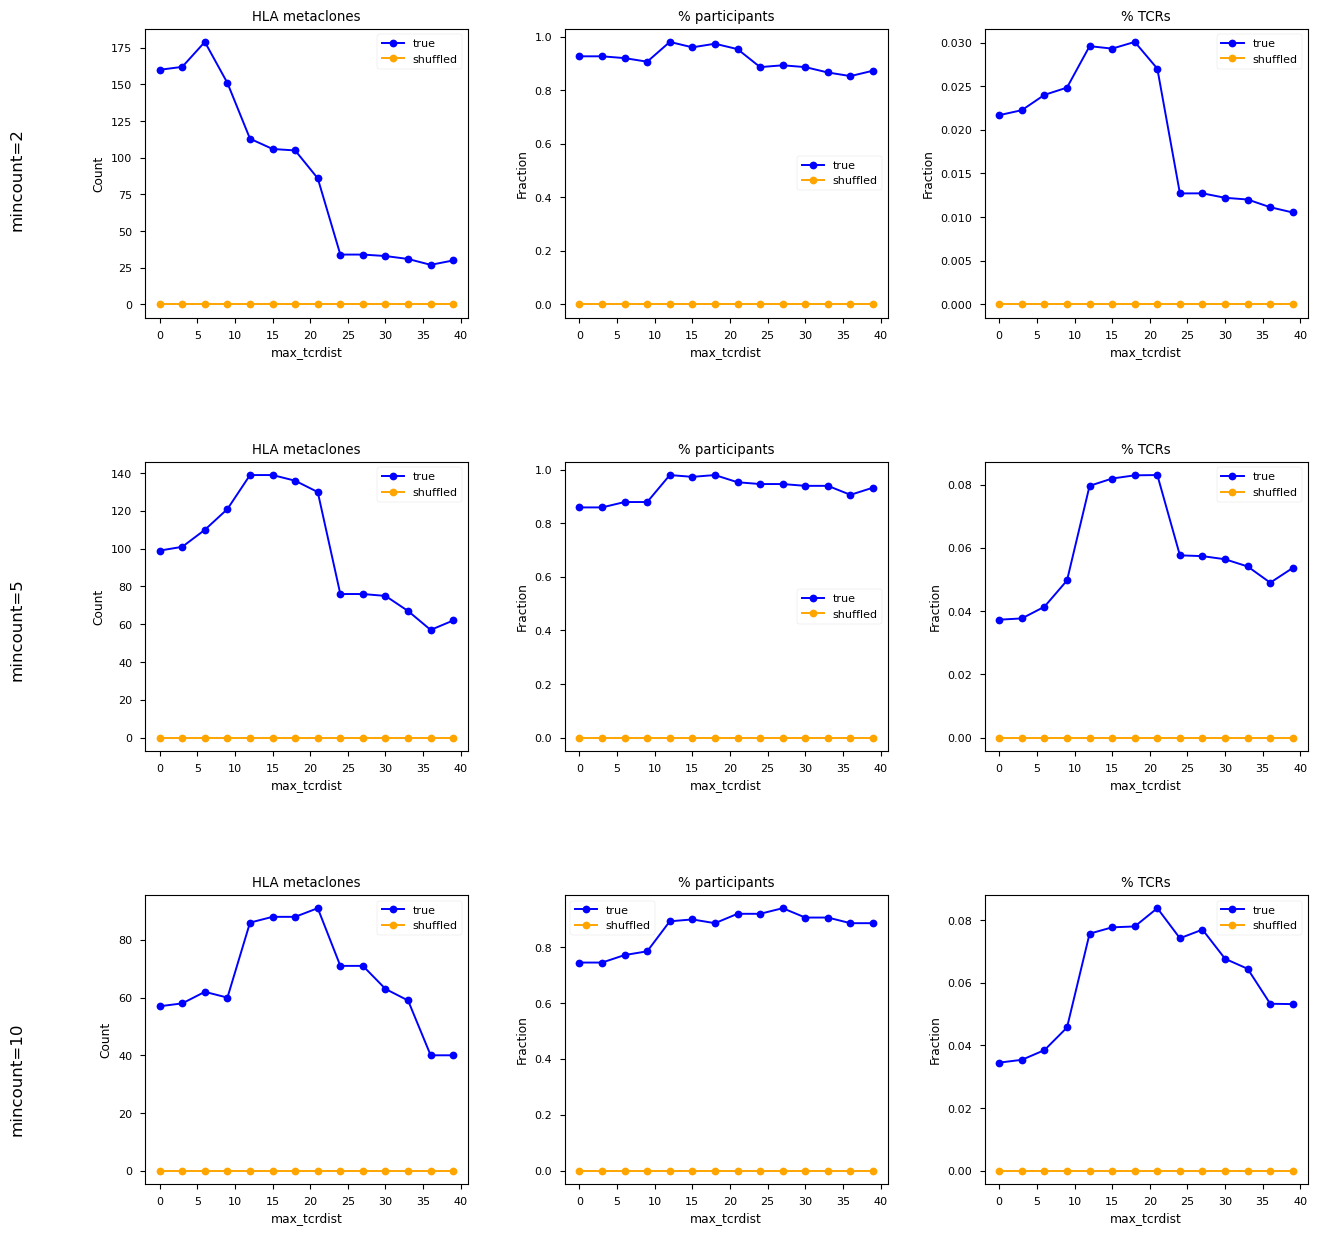

In [43]:
filtered_df = tst_stats_df[(tst_stats_df['chain'] == 'alpha') & 
                           (tst_stats_df['clustering'] == 'leiden')]


mincount_values = [2, 5, 10]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  

for i, mincount in enumerate(mincount_values):

    mincount_df = filtered_df[filtered_df['mincount'] == mincount].sort_values(by='max_tcrdist')

    # Subplot 1: HLA metaclones
    ax1 = axes[i, 0]
    ax1.plot(mincount_df['max_tcrdist'], mincount_df['nmetaclones'], label='true', color='blue', marker='o')
    ax1.plot(mincount_df['max_tcrdist'], mincount_df['nmetaclones_shuffled'], label='shuffled', color='orange', marker='o')
    ax1.set_title('HLA metaclones')
    ax1.set_xlabel('max_tcrdist')
    ax1.set_ylabel('Count')
    ax1.legend()

    # Subplot 2: % participants
    ax2 = axes[i, 1]
    ax2.plot(mincount_df['max_tcrdist'], mincount_df['id_fraction'], label='true', color='blue', marker='o')
    ax2.plot(mincount_df['max_tcrdist'], mincount_df['id_fraction_shuffled'], label='shuffled', color='orange', marker='o')
    ax2.set_title('% participants')
    ax2.set_xlabel('max_tcrdist')
    ax2.set_ylabel('Fraction')
    ax2.legend()

    # Subplot 3: % TCRs
    ax3 = axes[i, 2]
    ax3.plot(mincount_df['max_tcrdist'], mincount_df['sig_clonotype_fraction'], label='true', color='blue', marker='o')
    ax3.plot(mincount_df['max_tcrdist'], mincount_df['sig_clonotype_fraction_shuffled'], label='shuffled', color='orange', marker='o')
    ax3.set_title('% TCRs')
    ax3.set_xlabel('max_tcrdist')
    ax3.set_ylabel('Fraction')
    ax3.legend()


for i, mincount in enumerate(mincount_values):
    fig.text(0.04, 0.78 - (i * 0.30), f'mincount={mincount}', va='center', ha='center', rotation='vertical', fontsize=12)

plt.savefig("/Users/rishikasaxena/TRACERx_TCR_signatures-1/TST/figs/tst_parameters_alpha_leiden.png", dpi=300, bbox_inches='tight')
plt.show()

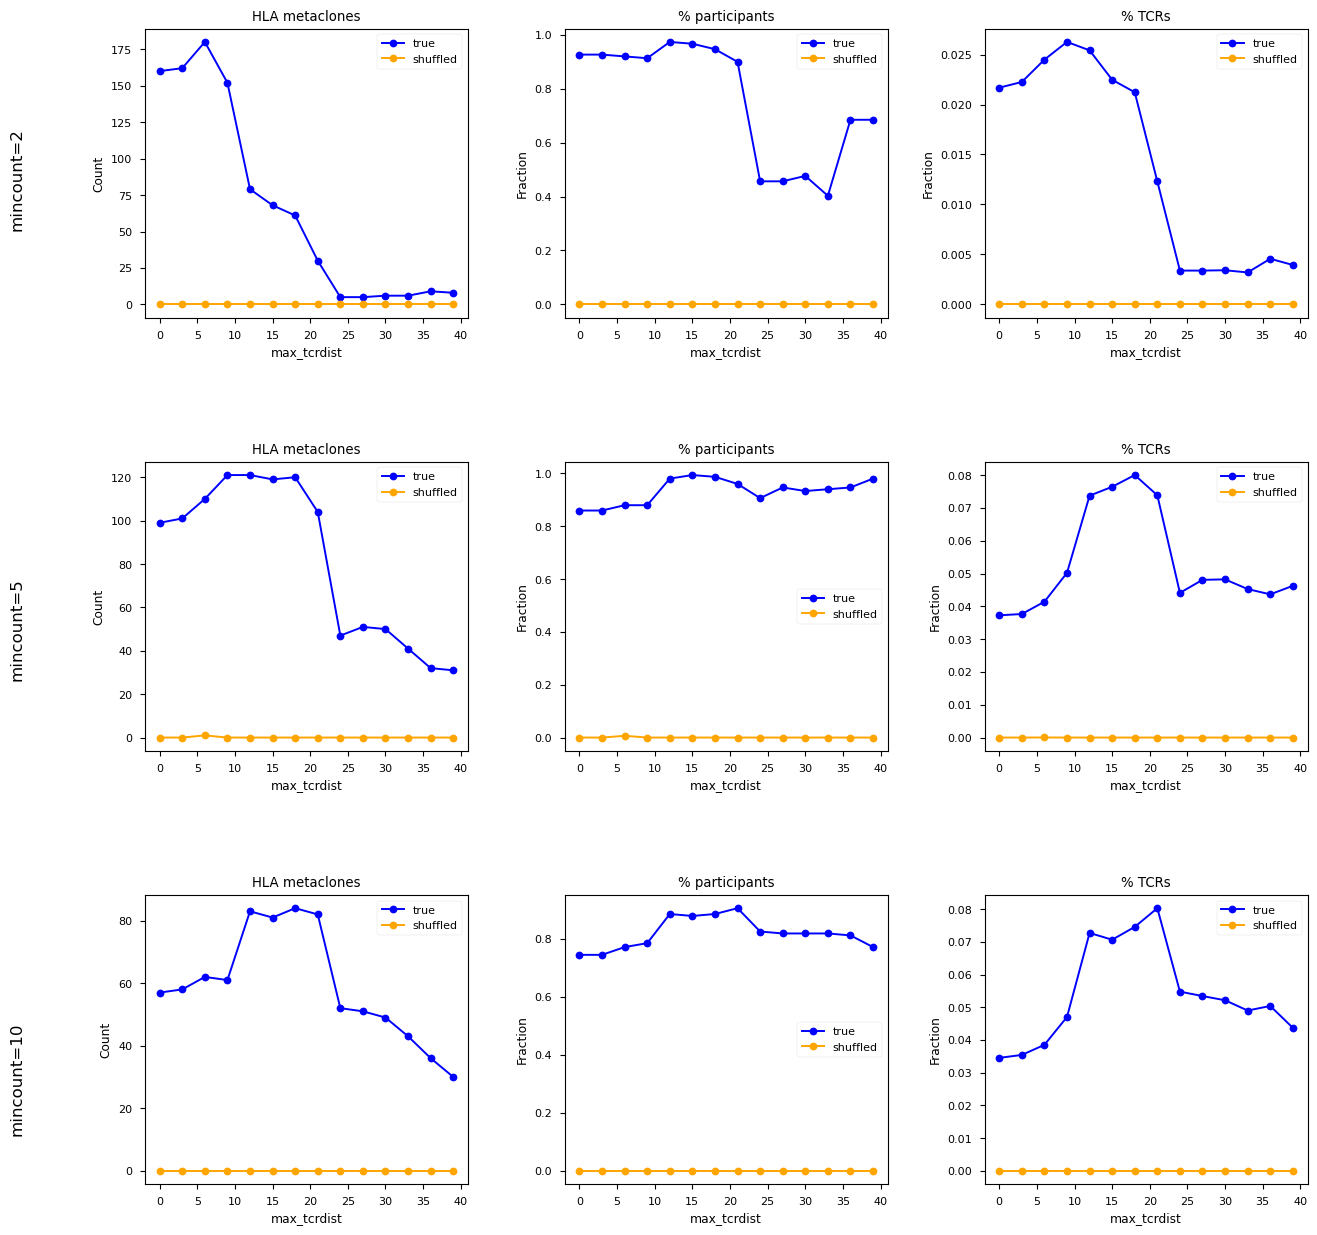

In [44]:
filtered_df = tst_stats_df[(tst_stats_df['chain'] == 'alpha') & 
                           (tst_stats_df['clustering'] == 'multilevel')]


mincount_values = [2, 5, 10]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3) 

for i, mincount in enumerate(mincount_values):

    mincount_df = filtered_df[filtered_df['mincount'] == mincount].sort_values(by='max_tcrdist')

    # Subplot 1: HLA metaclones
    ax1 = axes[i, 0]
    ax1.plot(mincount_df['max_tcrdist'], mincount_df['nmetaclones'], label='true', color='blue', marker='o')
    ax1.plot(mincount_df['max_tcrdist'], mincount_df['nmetaclones_shuffled'], label='shuffled', color='orange', marker='o')
    ax1.set_title('HLA metaclones')
    ax1.set_xlabel('max_tcrdist')
    ax1.set_ylabel('Count')
    ax1.legend()

    # Subplot 2: % participants
    ax2 = axes[i, 1]
    ax2.plot(mincount_df['max_tcrdist'], mincount_df['id_fraction'], label='true', color='blue', marker='o')
    ax2.plot(mincount_df['max_tcrdist'], mincount_df['id_fraction_shuffled'], label='shuffled', color='orange', marker='o')
    ax2.set_title('% participants')
    ax2.set_xlabel('max_tcrdist')
    ax2.set_ylabel('Fraction')
    ax2.legend()

    # Subplot 3: % TCRs
    ax3 = axes[i, 2]
    ax3.plot(mincount_df['max_tcrdist'], mincount_df['sig_clonotype_fraction'], label='true', color='blue', marker='o')
    ax3.plot(mincount_df['max_tcrdist'], mincount_df['sig_clonotype_fraction_shuffled'], label='shuffled', color='orange', marker='o')
    ax3.set_title('% TCRs')
    ax3.set_xlabel('max_tcrdist')
    ax3.set_ylabel('Fraction')
    ax3.legend()
    

for i, mincount in enumerate(mincount_values):
    fig.text(0.04, 0.78 - (i * 0.30), f'mincount={mincount}', va='center', ha='center', rotation='vertical', fontsize=12)

plt.savefig("/Users/rishikasaxena/TRACERx_TCR_signatures-1/TST/figs/tst_parameters_alpha_multilevel.png", dpi=300, bbox_inches='tight')

plt.show()

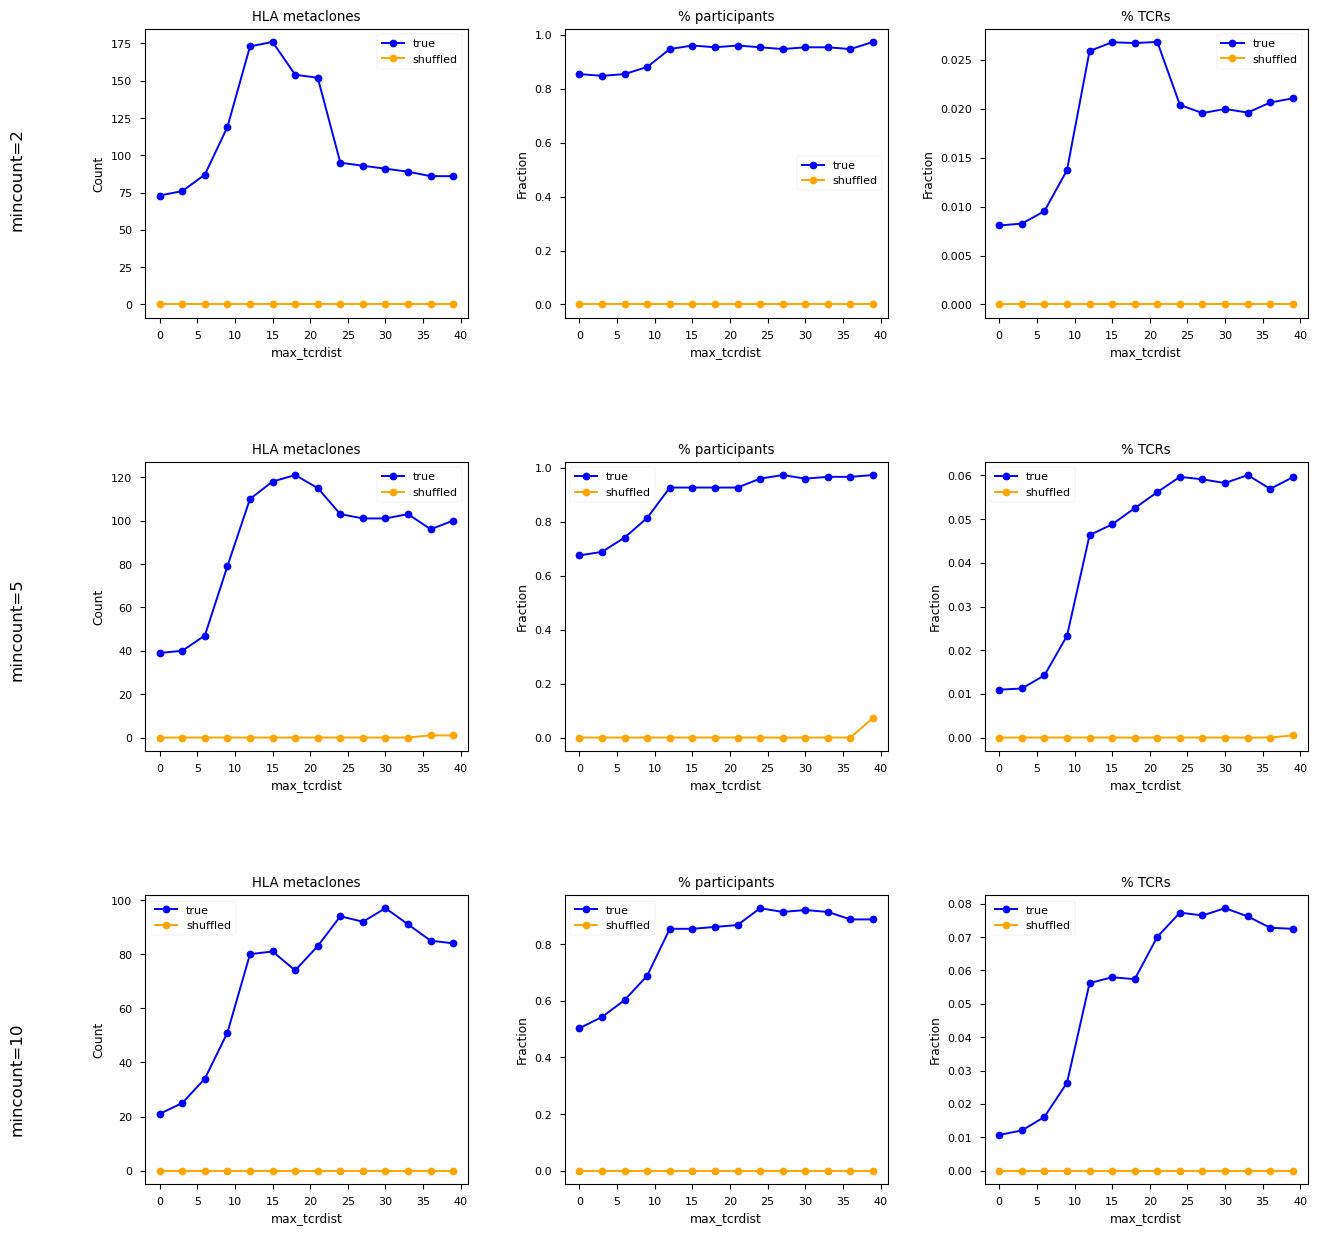

In [45]:
filtered_df = tst_stats_df[(tst_stats_df['chain'] == 'beta') & 
                           (tst_stats_df['clustering'] == 'leiden')]


mincount_values = [2, 5, 10]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, mincount in enumerate(mincount_values):

    mincount_df = filtered_df[filtered_df['mincount'] == mincount].sort_values(by='max_tcrdist')

    # Subplot 1: HLA metaclones
    ax1 = axes[i, 0]
    ax1.plot(mincount_df['max_tcrdist'], mincount_df['nmetaclones'], label='true', color='blue', marker='o')
    ax1.plot(mincount_df['max_tcrdist'], mincount_df['nmetaclones_shuffled'], label='shuffled', color='orange', marker='o')
    ax1.set_title('HLA metaclones')
    ax1.set_xlabel('max_tcrdist')
    ax1.set_ylabel('Count')
    ax1.legend()

    # Subplot 2: % participants
    ax2 = axes[i, 1]
    ax2.plot(mincount_df['max_tcrdist'], mincount_df['id_fraction'], label='true', color='blue', marker='o')
    ax2.plot(mincount_df['max_tcrdist'], mincount_df['id_fraction_shuffled'], label='shuffled', color='orange', marker='o')
    ax2.set_title('% participants')
    ax2.set_xlabel('max_tcrdist')
    ax2.set_ylabel('Fraction')
    ax2.legend()

    # Subplot 3: % TCRs
    ax3 = axes[i, 2]
    ax3.plot(mincount_df['max_tcrdist'], mincount_df['sig_clonotype_fraction'], label='true', color='blue', marker='o')
    ax3.plot(mincount_df['max_tcrdist'], mincount_df['sig_clonotype_fraction_shuffled'], label='shuffled', color='orange', marker='o')
    ax3.set_title('% TCRs')
    ax3.set_xlabel('max_tcrdist')
    ax3.set_ylabel('Fraction')
    ax3.legend()


for i, mincount in enumerate(mincount_values):
    fig.text(0.04, 0.78 - (i * 0.30), f'mincount={mincount}', va='center', ha='center', rotation='vertical', fontsize=12)

plt.savefig("/Users/rishikasaxena/TRACERx_TCR_signatures-1/TST/figs/tst_parameters_beta_leiden.png", dpi=300, bbox_inches='tight')
plt.show()

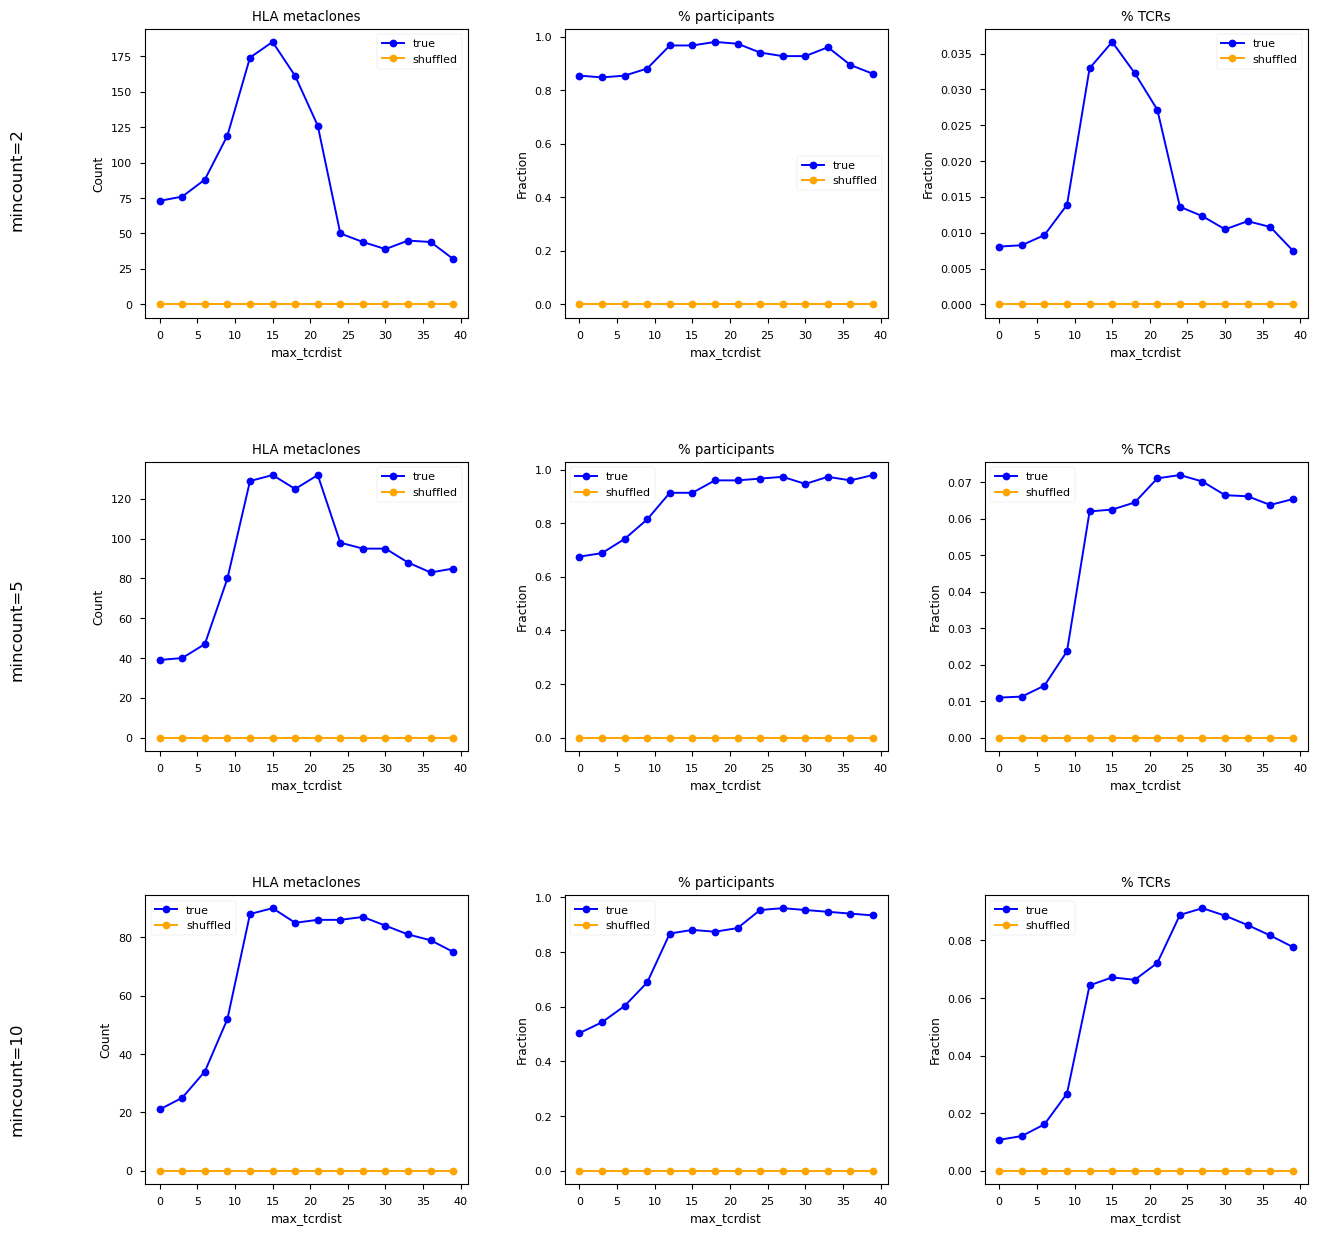

In [46]:
filtered_df = tst_stats_df[(tst_stats_df['chain'] == 'beta') & 
                           (tst_stats_df['clustering'] == 'multilevel')]


mincount_values = [2, 5, 10]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  

for i, mincount in enumerate(mincount_values):

    mincount_df = filtered_df[filtered_df['mincount'] == mincount].sort_values(by='max_tcrdist')

    # Subplot 1: HLA metaclones
    ax1 = axes[i, 0]
    ax1.plot(mincount_df['max_tcrdist'], mincount_df['nmetaclones'], label='true', color='blue', marker='o')
    ax1.plot(mincount_df['max_tcrdist'], mincount_df['nmetaclones_shuffled'], label='shuffled', color='orange', marker='o')
    ax1.set_title('HLA metaclones')
    ax1.set_xlabel('max_tcrdist')
    ax1.set_ylabel('Count')
    ax1.legend()

    # Subplot 2: % participants
    ax2 = axes[i, 1]
    ax2.plot(mincount_df['max_tcrdist'], mincount_df['id_fraction'], label='true', color='blue', marker='o')
    ax2.plot(mincount_df['max_tcrdist'], mincount_df['id_fraction_shuffled'], label='shuffled', color='orange', marker='o')
    ax2.set_title('% participants')
    ax2.set_xlabel('max_tcrdist')
    ax2.set_ylabel('Fraction')
    ax2.legend()

    # Subplot 3: % TCRs
    ax3 = axes[i, 2]
    ax3.plot(mincount_df['max_tcrdist'], mincount_df['sig_clonotype_fraction'], label='true', color='blue', marker='o')
    ax3.plot(mincount_df['max_tcrdist'], mincount_df['sig_clonotype_fraction_shuffled'], label='shuffled', color='orange', marker='o')
    ax3.set_title('% TCRs')
    ax3.set_xlabel('max_tcrdist')
    ax3.set_ylabel('Fraction')
    ax3.legend()
    

for i, mincount in enumerate(mincount_values):
    fig.text(0.04, 0.78 - (i * 0.30), f'mincount={mincount}', va='center', ha='center', rotation='vertical', fontsize=12)

plt.savefig("/Users/rishikasaxena/TRACERx_TCR_signatures-1/TST/figs/tst_parameters_beta_multilevel.png", dpi=300, bbox_inches='tight')
plt.show()